In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
%matplotlib inline

In [12]:
path = r"C:\Users\katey\Desktop\Final Unit CareerFoundry\6.1\citi_61.csv"

In [38]:
df_nyc = pd.read_csv(os.path.join(path, r"C:\Users\katey\Desktop\Final Unit CareerFoundry\6.1\citi_61.csv"))

In [39]:
df_nyc.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,female,9/9/2013 18:18,9/9/2013 18:35
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,male,9/12/2013 18:38,9/12/2013 18:48
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,male,9/18/2013 19:44,9/18/2013 19:50
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,female,9/28/2013 11:54,9/28/2013 12:03
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,female,9/27/2013 22:01,9/27/2013 22:08


In [40]:
df_sub = df_nyc[['day_of_week', 'start_hour', 'start_station_id', 'end_station_id','trip_duration']]

In [21]:
df_sub

,day_of_week,start_hour,start_station_id,end_station_id,trip_duration
0,Mon,18,523,334,993
1,Thu,18,257,236,581
2,Wed,19,479,513,361
3,Sat,11,527,441,561
4,Fri,22,293,432,427
...,...,...,...,...,...
42988,Sat,15,435,448,975
42989,Sun,16,224,301,1541
42990,Sat,17,261,151,1191
42991,Sat,18,402,524,1050


C:\Users\katey\AppData\Local\Temp\ipykernel_11172\3398174733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)


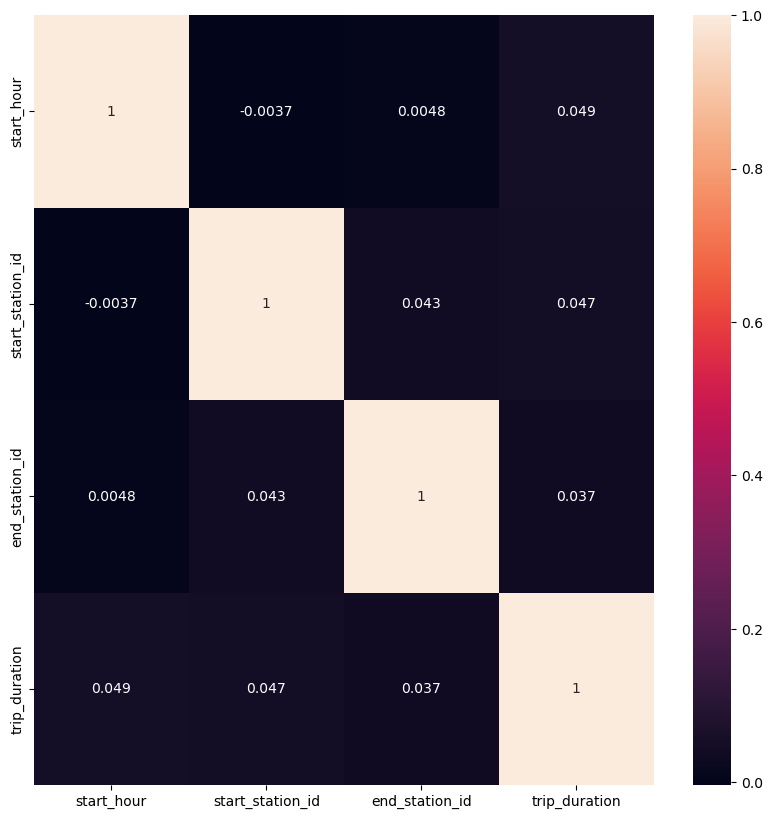

In [22]:
f,ax = plt.subplots(figsize=(10,10))
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

There are not any strong correlations between these variables. I think for this data set it would be difficult to use this type of visual.

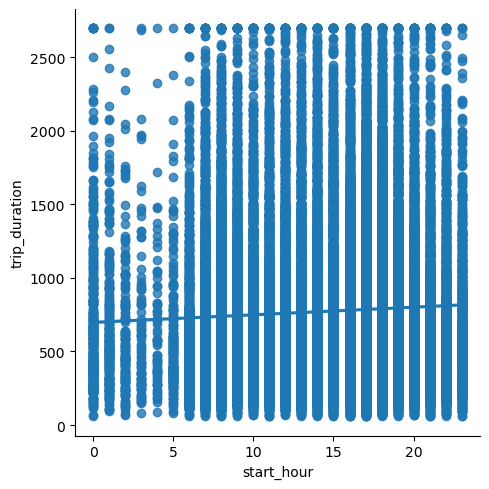

In [36]:
sns.lmplot(x = 'start_hour' , y = 'trip_duration', data = df_listings)

There appears to be no correlation between hour of the day and trip duration. This is good to note because it helps to answer once of my questions. There also appears to be some outliers at various times. I am going to investigate further.

In [41]:
df_nyc['trip_duration'].describe()

count    42993.000000
mean       770.502105
std        523.444233
min         60.000000
25%        395.000000
50%        621.000000
75%        999.000000
max       2697.000000
Name: trip_duration, dtype: float64

<Axes: >

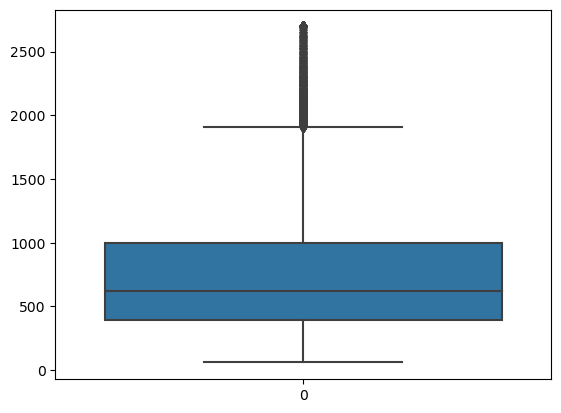

In [42]:
sns.boxplot(df_nyc['trip_duration'])

In [44]:
Q1_duration = df_nyc['trip_duration'].quantile(0.25)
Q3_duration = df_nyc['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
lower_duration = Q1_duration - 1.5*IQR_duration
upper_duration = Q3_duration + 1.5*IQR_duration

In [45]:
print(IQR_duration)
print(lower_duration)
print(upper_duration)

604.0
-511.0
1905.0


I have decided to group durations together based on wether they should be considered a short ride (less then 604.0) vs long ride (over 604.0)

In [63]:
df_nyc.loc[df_nyc['trip_duration'] <= 604.0, 'trip_type'] = 'Short Ride'

In [64]:
df_nyc.loc[df_nyc['trip_duration'] > 604.0, 'trip_type'] = 'Long Ride'

In [68]:
df_nyc.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_type
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,female,9/9/2013 18:18,9/9/2013 18:35,Long Ride
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,male,9/12/2013 18:38,9/12/2013 18:48,Short Ride
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,male,9/18/2013 19:44,9/18/2013 19:50,Short Ride
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,female,9/28/2013 11:54,9/28/2013 12:03,Short Ride
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,female,9/27/2013 22:01,9/27/2013 22:08,Short Ride


<Axes: >

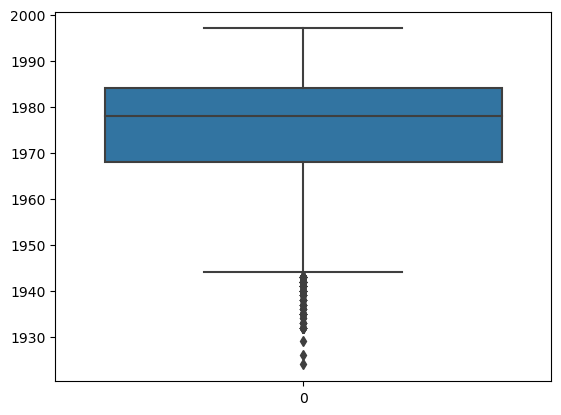

In [71]:
sns.boxplot(df_listings['birth_year'])

There appears to be outliers for birth_year that fall below 1945.

In [72]:
Q1_by = df_nyc['birth_year'].quantile(0.25)
Q3_by = df_nyc['birth_year'].quantile(0.75)
IQR_by = Q3_by - Q1_by
lower_by = Q1_by - 1.5*IQR_by
upper_by = Q3_by + 1.5*IQR_by

In [73]:
print(IQR_by)
print(lower_by)
print(upper_by)

16.0
1944.0
2008.0


<Axes: xlabel='birth_year', ylabel='Count'>

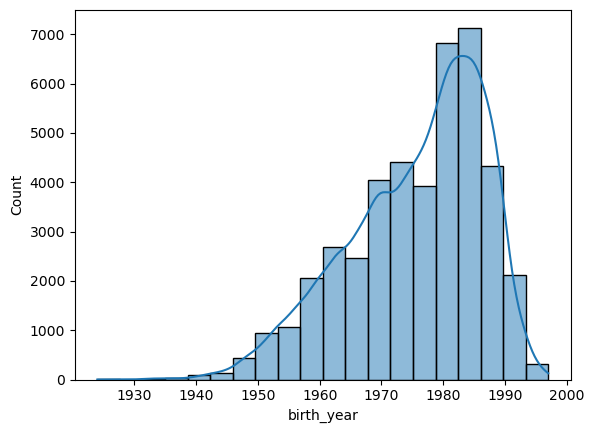

In [74]:
sns.histplot(df_listings['birth_year'],bins = 20, kde = True)

Hypothesis: If a person is between the ages of 20-30 then they will use 